                                 EXPLORATORY DATA-ANALYSIS OF ZOMATO DATASET

-----------------------------------------------------------------

WE HAVE A FOOD-DELIVERY COMPANY DATASET WHICH CONSISTS OF ITS RESTAURANT PARTNERS & ITS CUISINES WHICH IS SPREAD OVER DIFFERENT LOCATIONS ACROSS THE WORLD . IT ALSO HAS CUSTOMER RATINGS & OTHER DATA REGARDING ITS SERVICES .

HERE WE WILL BE PERFORMING EXPLORATORY DATA-ANALYSIS & GET INSIGHTS ABOUT THE DATA .

In [ ]:
pip install geopandas

In [ ]:
# import the necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    

In [ ]:
#importing dataset 1

df = pd.read_excel('zomato.xlsx')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
# getting more information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
# finding the spread of the data .
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
#checking for missing values & finding the percentage of missing values .
def missing_values(df):

  total = df.isnull().sum().sort_values(ascending = False)
  percentage = total/len(df)
  return (pd.concat([total,percentage] , axis = 1 , keys = ['total' , 'percentage']))

miss_values = missing_values(df)
miss_values[miss_values != 0 ]

,total,percentage
Cuisines,9.0,0.000942
Restaurant ID,NaN,NaN
Currency,NaN,NaN
Rating text,NaN,NaN
Rating color,NaN,NaN
Aggregate rating,NaN,NaN
Price range,NaN,NaN
Switch to order menu,NaN,NaN
Is delivering now,NaN,NaN
Has Online delivery,NaN,NaN


*SINCE THE PERCENTAGE OF MISSING DATA OF CUISINE COLUMN IS TOO LOW , THERE IS NO NECESSITY TO DROP ANY COLUMNS .*

In [ ]:
#finding the numerical columns in the dataset.

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include = numerics).head()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,6317637,162,121.027535,14.565443,1100,3,4.8,314
1,6304287,162,121.014101,14.553708,1200,3,4.5,591
2,6300002,162,121.056831,14.581404,4000,4,4.4,270
3,6318506,162,121.056475,14.585318,1500,4,4.9,365
4,6314302,162,121.057508,14.584450,1500,4,4.8,229


In [ ]:
#finding duplicate records if any

df[df.duplicated()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes


*IMPORTING & ANALYZING THE 2nd DATASET*

In [ ]:
#importing dataset 2
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


*WE CAN ALSO NOTICE THAT THERE IS A COUNTRY CODE COLUMN IN THE ZOMATO DATASET ( 1st dataset ) .*

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

*SO WE WILL BE MERGING THE DATASET AS THEY ARE HAVING A SIMILAR COLUMN IN BOTH THE DATASETS*

In [ ]:
final_df = pd.merge(df,df_country ,on = 'Country Code' , how = 'left')
final_df.head(3)
#here we have added the country column to the dataset.

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


###ZOMATO SERVICES  IN DIFFERENT COUNTRIES & CITIES .

*LET US SEE WHICH COUNTRIES HAS THE MOST ZOMATO PARTNERED RESTAURANTS & ITS SERVICES .*

In [ ]:
country_names = final_df.Country.value_counts().index #stores only the names
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [ ]:
country_val = final_df.Country.value_counts().values #stores the values i.e  count of restaurants in each country
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

([<matplotlib.patches.Wedge at 0x7fd1bce74670>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

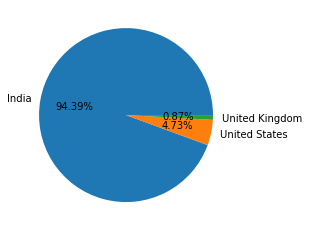

In [ ]:
#top 5 countries that uses zomato.
plt.pie(country_val[:3] ,labels = country_names[:3] , autopct='%1.2f%%')

OBSERVATION : *HERE WE CAN SEE THAT 94.39%  OF ZOMATO's BUSINESS IS IN INDIA*

ALSO LET US SEE WHICH CITIES HAVE THE MOST ZOMATO PARTNERED RESTAURANT .

In [ ]:
df.City.value_counts().sort_values(ascending = False)

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Armidale               1
Tagaytay City          1
Randburg               1
Quezon City            1
Vineland Station       1
Name: City, Length: 141, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd1bcb42e50>,
 [Text(-0.6836225695617262, 0.8617773392157762, 'New Delhi'),
  Text(0.24897482286810813, -1.0714530029720364, 'Gurgaon'),
  Text(0.9941442744692855, -0.47082604169686504, 'Noida')],
 [Text(-0.37288503794275973, 0.47006036684496877, '71.35%'),
  Text(0.13580444883714987, -0.5844289107120197, '14.57%'),
  Text(0.542260513346883, -0.25681420456192633, '14.08%')])

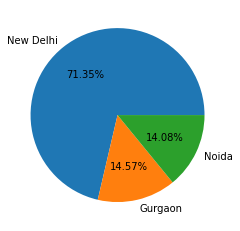

In [ ]:
city_names = final_df.City.value_counts().index
city_count = final_df.City.value_counts().values
plt.pie(city_count[:3] , labels = city_names[:3] , autopct = '%1.2f%%')

###ZOMATO CUSTOMER RATINGS

COLUMNS USED FOR ANALYSIS -

*   Aggregate rating - 0 to 5 
*   Rating color - [ ' Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red']
*   Rating text - [ ' Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor']




In [ ]:
ratings = final_df.groupby(['Aggregate rating' , 'Rating color' , 'Rating text']).size().reset_index().rename(columns = {0:'rating count'})
ratings

,Aggregate rating,Rating color,Rating text,rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


*HERE WE CAN SEE THE RATINGS WITH THEIR APPROPRIATE COLOR AND ALSO THE TOTAL COUNT OF EACH RATINGS  .

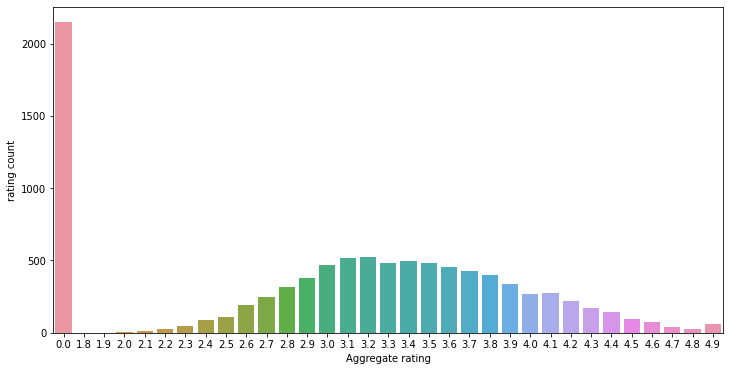

In [ ]:
#plotting a graph to find the count of each aggregate rating 

plt.figure(figsize = (12,6)) #to increase the size of the graph
sb.barplot(x ="Aggregate rating" , y = 'rating count' , data = ratings)

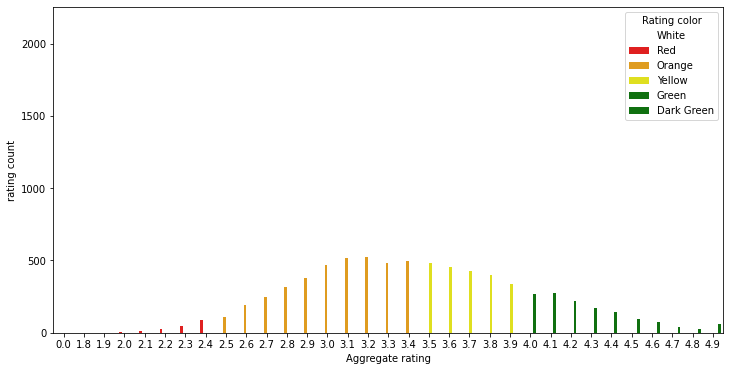

In [ ]:
#plotting a graph with aggregate rating & its count with respect to its rating colors 

plt.figure(figsize = (12,6))
sb.barplot(x ="Aggregate rating" , y = 'rating count' , hue = "Rating color" , data = ratings , palette = ['white','red','orange','yellow' , 'green','green'])

OBSERVATIONS -

*   *MANY PEOPLE HAVE NOT GIVEN ANY RATING AND THE COUNT OF IT IS TOO HIGH*
*   *MAXIMUM NUMBER OF PEOPLE HAVE RATED BEWTEEN 2.9 & 3.9 ( which means most of the time the food was average & good)*


###FINDING WHICH COUNTRY HAS NOT GIVEN ANY RATING IN MAJORITY

In [ ]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
agg = df['Aggregate rating']
agg_zero_rating = agg[agg==0]
final_df.groupby([agg_zero_rating, 'Country']).size().sort_values(ascending = False)

Aggregate rating  Country       
0.0               India             2139
                  Brazil               5
                  United States        3
                  United Kingdom       1
dtype: int64

OBSERVATION - INDIANS HAVE NOT GIVEN ANY RATINGS  MOST OF THE TIME .

*THIS IS MAYBE PEOPLE TEND TO GIVE RATINGS ONLY WHEN THE FOOD IS BAD OR THE SERVICE IS POOR & I PERSONALLY BEING AN INDIAN SKIP GIVING ANY RATING .*

###ONLINE DELIVERY & TABLE BOOKING SERVICES 


In [ ]:
final_df['Has Online delivery'].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

In [ ]:
final_df[final_df['Has Online delivery']=='Yes'].groupby('Country').size().reset_index()

,Country,0
0,India,2423
1,UAE,28


OBSERVATION - *WE CAN SEE THAT INDIA HAS THE HIGHEST NUMBER OF ONLINE DELIVERIES ( This because zomato is a indian startup and its majority of market share is india ).*

*APART FROM INDIA , EVEN UK HAS A SMALL AMOUNT OF ONLINE FOOD DELIVERY SERVICES .*

In [ ]:
final_df['Has Table booking'].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

In [ ]:
final_df[final_df['Has Table booking'] == 'Yes'].groupby('Country').size()

Country
India             1111
Phillipines         14
Qatar                1
South Africa         2
UAE                 18
United Kingdom      12
dtype: int64

OBSERVATION - *HERE WE CAN SEE THAT INDIA HAS THE HIGHEST NUMBER OF TABLE BOOKING SERVICE BY ZOMATO , FOLLOWED BY 5 OTHER DIFFERENT COUNTRIES .*

###RESTAURANTS  & ITS  CUISINES



In [ ]:
#Lets find out how many number of cuisines are there.
len(df.Cuisines.unique())

1826

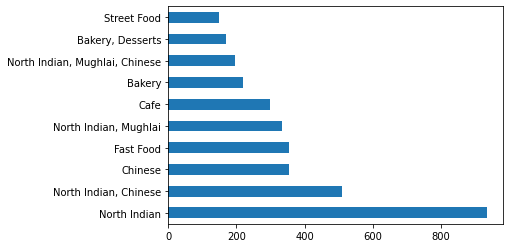

In [ ]:
#Top 10 most available  cuisines on zomato
final_df.Cuisines.value_counts().sort_values(ascending = False)[:10].plot(kind = 'barh')

*HERE WE CAN SEE THE TOP 10 MOST AFFORDABLE RESTAURANTS & ITS CUISINES .* 

NOTE : *SOME RESTAURANTS HAVE 0 AS AVERAGE COST WHICH IS PRACTICALLY IMPOSSIBLE .( Needs to be investigated , maybe the restaurant has declared their average cost ).*

In [ ]:
final_df[final_df['Average Cost for two'] > 0].groupby(['Average Cost for two','Restaurant Name','Cuisines' ,'Country']).size().reset_index()[:20]

,Average Cost for two,Restaurant Name,Cuisines,Country,0
0,7,Beach Box Cafe,"Burger, Coffee and Tea, Modern Australian",Australia,1
1,7,Funkey Monkey,"Breakfast, Coffee and Tea",Australia,1
2,7,La Trattoria of Lavandula,"Italian, Fusion, Cafe",Australia,1
3,7,The Giggling Goat,"Coffee and Tea, Tea, Modern Australian",Australia,1
4,10,3 Squares Diner,"American, Breakfast, Diner",United States,1
5,10,A Dong Restaurant,"Asian, Vegetarian, Vietnamese, Bubble Tea",United States,1
6,10,Aloha Mixed Plate,"Asian, Breakfast, Hawaiian",United States,1
7,10,BJ's Country Buffet,"American, BBQ",United States,1
8,10,Bailey's Bar-B-Que,BBQ,United States,1
9,10,Bandit Burrito,"Breakfast, Mexican, Southwestern",United States,1


###ZOMATO SERVICES WORLDWIDE VISUALIZATION

In [ ]:
final_df[['Longitude','Latitude']]

,Longitude,Latitude
0,121.027535,14.565443
1,121.014101,14.553708
2,121.056831,14.581404
3,121.056475,14.585318
4,121.057508,14.584450
...,...,...
9546,28.977392,41.022793
9547,29.041297,41.009847
9548,29.034640,41.055817
9549,29.036019,41.057979


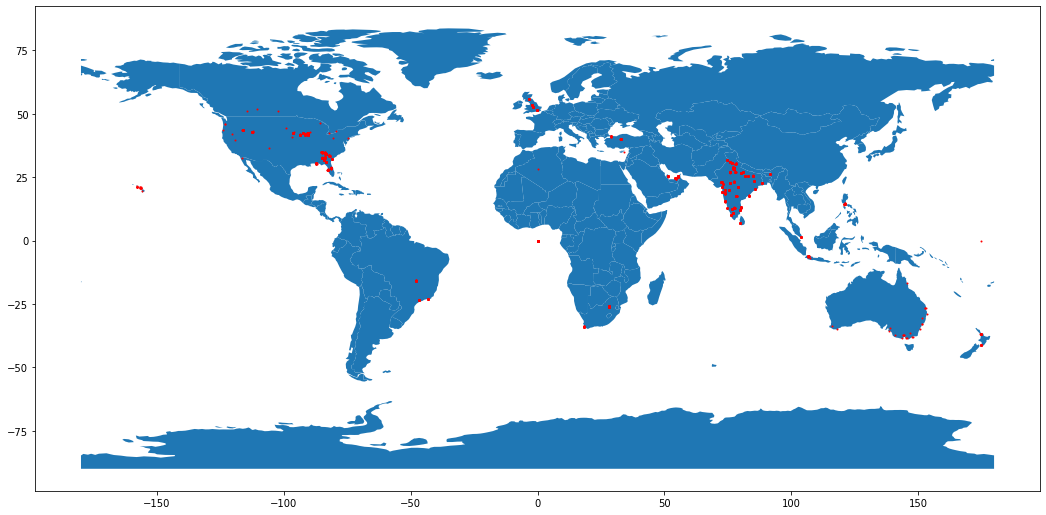

In [ ]:
my_data = gpd.GeoDataFrame(geometry = gpd.points_from_xy(df['Longitude'] , df['Latitude']))

world_map.plot(column = None , figsize = (18,12))
my_data.plot(ax=plt.gca(),color = 'red', markersize = 1)
plt.show()

OBSERVATION - *HERE WE HAVE TAKEN THE WHOLE DATA AND PLOTTED ( We can also take a sample & plot for more precise visualization )*.

NOTE - *SOME CO-ORDINATES ARE INNACURATE AS OBSERVED IN THE VISUALIZATION .*

###SUMMARY & CONCLUSION



*   *ZOMATO HAS 94.39%  OF ITS  BUSINESS IN INDIA & HAS A VAST RESTAURANTS PARTNERED WITH ITS SERVICES .*
*   *ALSO NEW DELHI HIGHEST NUMBER OF ZOMATO PARTNERED RESTAURANTS.*

*   *IT IS TO BE NOTED THAT MAXIMUM NUMBER OF PEOPLE HAVE NOT GIVEN ANY RATINGS REGARDING THE FOOD or THE SERVICE .*
*   *THE AVERAGE RATING IS 3.5 WHICH MEANS THE FOOD WAS GOOD / AVERAGE.*

*   *INDIANS IN MAJORITY HAVE NOT GIVEN ANY RATING COMPARED TO OTHER COUNTRIES INSPITE OF IT BEING THE MAJOR REVENUE FOR ZOMATO.*
*   *SO DERIVING ANY CONCLUSION ON CUSTOMER EXPERIENCE BASED ON THE RATINGS WILL BE INNACURATE *.

*   *ZOMATO PROVIDES A LESSER AMOUNT OF ONLINE DELIVERY SERVICES & ALSO TABLE BOOKING SERVICES* 


*   *THERE ARE 1826 TYPES OF CUSINES IN WHICH NORTH INDIAN CUISINE RESTAURANTS ARE MORE FOLLOWED BY CHINESE & FAST FOOD.*
*   *ALSO THE CURRENCY OF AVERAGE COST ISNT SPECIFIED WHICH MAKES IT DIFFICULT TO ANALYSE IT . BUT WE CAN STILL NOTE THAT AUSTRALIA & USA HAVE THE MOST AFFORDABLE RESTAURANTS .*









